# <font color = 'pickle'>**Import/Install the packages**

In [13]:
!pip install --upgrade feature_engine scikit-learn -q

In [14]:
!pip show feature_engine scikit-learn

Name: feature-engine
Version: 1.6.2
Summary: Feature engineering package with Scikit-learn's fit transform functionality
Home-page: http://github.com/feature-engine/feature_engine
Author: Soledad Galli
Author-email: solegalli@protonmail.com
License: BSD 3 clause
Location: /home/harpreet/mambaforge/lib/python3.10/site-packages
Requires: numpy, pandas, scikit-learn, scipy, statsmodels
Required-by: 
---
Name: scikit-learn
Version: 1.3.1
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /home/harpreet/mambaforge/lib/python3.10/site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bertopic, fastai, feature-engine, hdbscan, pynndescent, sentence-transformers, umap-learn


In [15]:
"""Importing the required packages"""

# For DataFrames and manipulations
import pandas as pd
import numpy as np

# For data Visualization
import matplotlib.pyplot as plt
%matplotlib inline


# drop arbitrary features
from feature_engine.selection import DropFeatures

# For categorical variables
from feature_engine.encoding import OneHotEncoder
from feature_engine.encoding import DecisionTreeEncoder

# Missing value imputation
from feature_engine.imputation import MeanMedianImputer

# add missing indicator 
from feature_engine.imputation import AddMissingIndicator

# categorical imputer
from feature_engine.imputation import CategoricalImputer

# random sample imputer
from feature_engine.imputation import RandomSampleImputer

# Numerical variable Transformation
from feature_engine.transformation import LogTransformer

# Handling Outliers
from feature_engine.outliers import Winsorizer

# feature engine wrapper 
from feature_engine.wrappers import SklearnTransformerWrapper

# sklearn pre-processor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

# DIscretization
from sklearn.preprocessing import KBinsDiscretizer

# For splitting the dataset
from sklearn.model_selection import train_test_split

# Using Logistic Regression classification for our data
from sklearn.linear_model import LogisticRegression

# creating pipelines 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Hyper parameter tuning
from sklearn.model_selection import GridSearchCV

# draws a confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

# save and load models
import joblib

# Pathlib to navigate file system
from pathlib import Path
import sys

# <font color = 'pickle'> **Specify Project Folder Location**

In [16]:
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/drive') 

In [17]:
if 'google.colab' in str(get_ipython()):
    base_folder = Path('/content/drive/MyDrive/data/')
else:
    base_folder = Path('/home/harpreet/Insync/google_drive_shaannoor/data/')

In [18]:
data_folder = base_folder/'datasets'
save_model_folder = base_folder/'models/ml_fall_2023'
custom_function_folder = base_folder/'custom-functions'
save_model_folder.mkdir(exist_ok=True, parents=True)

In [19]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
sys.path.append(str(custom_function_folder))

In [21]:
sys.path

['/home/harpreet/Insync/google_drive_teaching/teaching_fall_2023/ML/6_Lecture_LR_Code',
 '/home/harpreet/mambaforge/lib/python310.zip',
 '/home/harpreet/mambaforge/lib/python3.10',
 '/home/harpreet/mambaforge/lib/python3.10/lib-dynload',
 '',
 '/home/harpreet/mambaforge/lib/python3.10/site-packages',
 '/home/harpreet/mambaforge/lib/python3.10/site-packages/sentencepiece-0.1.95-py3.10-linux-x86_64.egg',
 '/home/harpreet/Insync/google_drive_shaannoor/data/custom-functions',
 '/home/harpreet/Insync/google_drive_shaannoor/data/custom-functions']

In [22]:
from  plot_learning_curve import plot_learning_curve

In [23]:
from eda_plots import diagnostic_plots, plot_target_by_category

# <font color = 'pickle'>**Import the dataset**
Next, we will create variables to store paths where the data exists and where we will save the model. 

Now, we will create a variable to store the specific data file path from the data source folder.

In [24]:
file = data_folder / 'modified_churn.csv'

Now, we will create a data-frame using the above file path and Pandas....  

In [25]:
df = pd.read_csv(file)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4074 entries, 0 to 4073
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       4074 non-null   int64  
 1   RowNumber        4074 non-null   int64  
 2   CustomerId       4074 non-null   int64  
 3   Surname          4074 non-null   object 
 4   CreditScore      4074 non-null   int64  
 5   Geography        3585 non-null   object 
 6   Gender           4033 non-null   object 
 7   Age              3543 non-null   float64
 8   Tenure           4072 non-null   float64
 9   Balance          4067 non-null   float64
 10  NumOfProducts    4070 non-null   float64
 11  HasCrCard        4074 non-null   int64  
 12  IsActiveMember   4074 non-null   int64  
 13  EstimatedSalary  4074 non-null   float64
 14  Exited           4074 non-null   int64  
dtypes: float64(5), int64(7), object(3)
memory usage: 477.5+ KB


# <font color = 'pickle'>**Split Data into Train/Test set**

In [27]:
# before doing any data cleaning step we need to first split the data into train/test
X = df.drop(['Exited'], axis =1)
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0, stratify =y)

# <font color = 'pickle'>**Complete Pipeline**

We will start  with churn_pipleline_3 from knn_complete example. We will change the final steps to logistic regression and fine tune the hyperparameters of logistic regression now.
The three important hyperparameters for LogisticRegression() in sklearn are :

- penalty: This is related to type of reglarization (norm). The three options are l2, l1 and elasticnet.
- C: Inverse of regularization strength. We can increase/descrease C to increase/deecrease model complexity. Smaller values specify stronger regularization.

- l1 ratio: The Elastic-Net mixing parameter. The value lies between 0 and 1.  The value of 0 will mean l1 penalty only  and value of 1 will mean l2 penalty only.  

**We will use penalty = elasticnet and tune l1 ratio. We will tune C to control strength of regularizaation**.

We will first try to overfit the data. We can do that by specifying a very high value for C.





In [35]:
columns_to_drop = ['RowNumber', 'CustomerId', 'Surname','Unnamed: 0']

churn_pipeline_3 = Pipeline([
                           
    ('drop_features',
      DropFeatures(columns_to_drop)),

    ('imputer_median',
      MeanMedianImputer(imputation_method='median', variables=['Age', 'Balance', 'NumOfProducts'])),

    ('imputer_catgorical_frequent',
      CategoricalImputer(imputation_method = 'frequent', variables=['Gender','Geography'])),

      ('imputer_missing_indicator',
      AddMissingIndicator(variables=['Age', 'Geography'])),

    ('imputer_random_sample',
      RandomSampleImputer(random_state=123, variables=['Tenure'])),
    
    ('log_transformer', LogTransformer(variables = ['Age'])
      ),
    
    ('discretizer_cs',
      SklearnTransformerWrapper(KBinsDiscretizer(n_bins=10, encode= 'ordinal', strategy = 'kmeans', subsample= None), 
                               variables = ['CreditScore'])),

    ('discretizer_bal',
      SklearnTransformerWrapper(KBinsDiscretizer(n_bins=10, encode= 'ordinal', strategy = 'kmeans' , subsample=None), 
                               variables = ['Balance'])),
    
    ('decision_tree_encoder',
      DecisionTreeEncoder(random_state=123,
                    encoding_method = 'ordered',
                    regression = False,
                    scoring = 'accuracy',
                    variables=['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'CreditScore', 'Balance'],
                    ignore_format=True)),

    ('outlier',
      Winsorizer(capping_method='gaussian', tail ='both', fold = 3, variables=['Age'])),

    ('scalar',
      SklearnTransformerWrapper(StandardScaler(), variables = ['Age', 'Tenure', 'EstimatedSalary', 'NumOfProducts'])),

    ('logreg',
     LogisticRegression(random_state=123, max_iter =100000, n_jobs=-1
                       ,solver = 'saga'))
])

In [36]:
from sklearn import set_config

set_config(display='diagram')
churn_pipeline_3

Pipeline(steps=[('drop_features',
                 DropFeatures(features_to_drop=['RowNumber', 'CustomerId',
                                                'Surname', 'Unnamed: 0'])),
                ('imputer_median',
                 MeanMedianImputer(variables=['Age', 'Balance',
                                              'NumOfProducts'])),
                ('imputer_catgorical_frequent',
                 CategoricalImputer(imputation_method='frequent',
                                    variables=['Gender', 'Geography'])),
                ('imputer_missing_indicator',
                 AddMissingI...
                                     variables=['Geography', 'Gender',
                                                'HasCrCard', 'IsActiveMember',
                                                'CreditScore', 'Balance'])),
                ('outlier', Winsorizer(tail='both', variables=['Age'])),
                ('scalar',
                 SklearnTransformerWrapper(transformer=StandardScaler(),
                                           variables=['Age', 'Tenure',
                                                      'EstimatedSalary',
                                                      'NumOfProducts'])),
                ('logreg',
                 LogisticRegression(max_iter=100000, n_jobs=-1,
                                    random_state=123, solver='saga'))])

## <font color = 'pickle'>**Hyperparameter Tuning - Round 1**

### <font color = 'pickle'>**Specify Param Grid**

**It is normally a good idea to use log scale to specify search space for C. We willl not serach over C in the first round. In the first round we will try to see if we can overfit the training data. We can do that by specifying a very high value for C.**. 

In [37]:
print(f'{np.logspace(-3,3, num=5)}')

[1.00000000e-03 3.16227766e-02 1.00000000e+00 3.16227766e+01
 1.00000000e+03]


In [38]:
for x in np.logspace(-3,3, num=5):
    print(f'{x:.4f}')

0.0010
0.0316
1.0000
31.6228
1000.0000


In [39]:
# we will use linspace for l1_ratio
np.linspace(0,1, 5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [40]:
# now we create the grid with all the parameters that we would like to test

param_grid_1 = {
    'discretizer_cs__transformer__n_bins': range(2, 8, 2),
    'discretizer_bal__transformer__n_bins': range(2, 8, 2),
    'scalar__transformer': [StandardScaler(), MinMaxScaler()],
    'logreg__C': [10000000000],
    }

#'logreg__l1_ratio': np.linspace(0, 1, 5)

# now we set up the grid search with cross-validation
grid_logreg_1 = GridSearchCV(churn_pipeline_3, param_grid_1,
                           cv=5, return_train_score= True, n_jobs=-1 )

### <font color = 'pickle'>**Fit Model**

In [41]:
grid_logreg_1.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('drop_features',
                                        DropFeatures(features_to_drop=['RowNumber',
                                                                       'CustomerId',
                                                                       'Surname',
                                                                       'Unnamed: '
                                                                       '0'])),
                                       ('imputer_median',
                                        MeanMedianImputer(variables=['Age',
                                                                     'Balance',
                                                                     'NumOfProducts'])),
                                       ('imputer_catgorical_frequent',
                                        CategoricalImputer(imputation_method='frequent',
                                                           variables=['Gender',
                                                                      'Geography'])),
                                       ('imputer_...
                                                                             'EstimatedSalary',
                                                                             'NumOfProducts'])),
                                       ('logreg',
                                        LogisticRegression(max_iter=100000,
                                                           n_jobs=-1,
                                                           random_state=123,
                                                           solver='saga'))]),
             n_jobs=-1,
             param_grid={'discretizer_bal__transformer__n_bins': range(2, 8, 2),
                         'discretizer_cs__transformer__n_bins': range(2, 8, 2),
                         'logreg__C': [10000000000],
                         'scalar__transformer': [StandardScaler(),
                                                 MinMaxScaler()]},
             return_train_score=True)

### <font color = 'pickle'>**Get Best Params**

In [42]:
#Let's check the best_parameters from GridSearchCv for our model
print(grid_logreg_1.best_params_)

{'discretizer_bal__transformer__n_bins': 6, 'discretizer_cs__transformer__n_bins': 6, 'logreg__C': 10000000000, 'scalar__transformer': StandardScaler()}


### <font color = 'pickle'>**Save Model**

In [43]:
file_best_estimator_round1 = save_model_folder / 'logreg_round1_best_estimator.pkl'
file_complete_grid_round1 = save_model_folder / 'logreg_round1_complete_grid.pkl'

In [44]:
joblib.dump(grid_logreg_1.best_estimator_, file_best_estimator_round1)
joblib.dump(grid_logreg_1, file_complete_grid_round1)

['/home/harpreet/Insync/google_drive_shaannoor/data/models/ml_fall_2023/logreg_round1_complete_grid.pkl']

### <font color = 'pickle'>**Load Saved Model**

In [45]:
loaded_best_estimator_round1 = joblib.load(file_best_estimator_round1)
loaded_complete_grid_round1 = joblib.load(file_complete_grid_round1)

### <font color = 'pickle'>**Plot Learning Curve**

<module 'matplotlib.pyplot' from '/home/harpreet/mambaforge/lib/python3.10/site-packages/matplotlib/pyplot.py'>

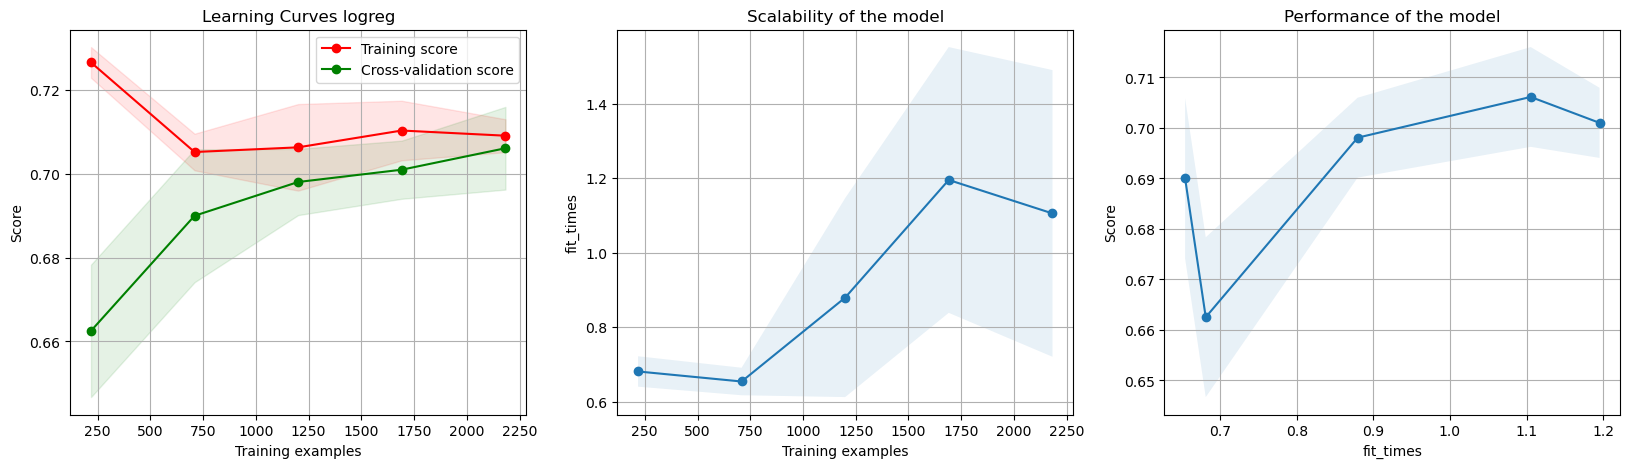

In [46]:
plot_learning_curve(loaded_best_estimator_round1, 'Learning Curves logreg', X_train, y_train, n_jobs=-1)

From the learning curves, its is clear that both training and cross validation scores are low. <font color = 'indianred'> **So there is clearly underfitting.**</font> Even for very small training data, the training score is less than what we got from KNN. Since, we have not used any regularization, we cannot increase the capacity of model. **Hence, we will not do any further hyperparameter tuning.** <font color = 'indianred'> **In case of underfitting, adding more training data will also not help. We can improve the perfromnace further by two methods (1) By adding more features or (2) by using non-linear models.** </font> 

- We will next try adding more features. Specifically, we will now add polynomial features for ['Age', 'Tenure', 'EstimatedSalary', 'NumOfProducts']. e.g. we will add higher order terms like Age, $(Age)^2$, $Age * Tenure$,  $(Tenure)^2$) etc.

- We can also try adding higher order terms for categorical variables- mostly interaction terms. I have not tried that in this example. In sklearn you can do that with the setting interaction_only=True.

### <font color = 'pickle'>**Check Cross Validation Score and Train Score**

In [47]:
#let's check the train scores
print(loaded_best_estimator_round1.score(X_train,y_train))

#let's check the cross validation score
print(loaded_complete_grid_round1.best_score_)

0.709783803591059
0.7068555297913096


## <font color = 'pickle'>**Hyperparameter Tuning - Round 2**

The polynomial transformations are not available in fearture-engine, hence we will use PolynomialFeatures transformer from sklearn. We will not be able to use SklearnTransformerWrapper from feature engine to select faetures because this transformer generates new columns. Hence we will use ColumnTransformer from sklearn to apply this to selected columns. The output from sklearn transformer is a numpy array. The feature engine transformer takes Pandas dataframe as input. Since all other transformers are feature engine transformer, we will apply this transformer as the last pre-processing step.

### <font color = 'pickle'>**Modified Pipeline to add Polynomial Terms**

In [48]:
# degree here refer to maximum degree of polynomials we will consider. For example if we have two variables X1, X2 and 
# if we specify degree = 2, then it wil generate following variables - X1, X2, X1*X2, X1*X1 and X2*X2.

poly_transformer = ColumnTransformer( transformers=[('transformer', PolynomialFeatures(degree = 2),
                                                   ['Age', 'Tenure', 'EstimatedSalary', 'NumOfProducts'])]        
                                                   ,remainder = 'passthrough')

In [54]:
columns_to_drop = ['RowNumber', 'CustomerId', 'Surname','Unnamed: 0']

churn_pipeline_poly = Pipeline([
                           
    ('drop_features',
      DropFeatures(columns_to_drop)),

    ('imputer_median',
      MeanMedianImputer(imputation_method='median', variables=['Age', 'Balance', 'NumOfProducts'])),

    ('imputer_catgorical_frequent',
      CategoricalImputer(imputation_method = 'frequent', variables=['Gender','Geography'])),

      ('imputer_missing_indicator',
      AddMissingIndicator(variables=['Age', 'Geography'])),

    ('imputer_random_sample',
      RandomSampleImputer(random_state=123, variables=['Tenure'])),
    
    ('log_transformer', LogTransformer(variables = ['Age'])
      ),
    
    ('discretizer_cs',
      SklearnTransformerWrapper(KBinsDiscretizer(n_bins=10, encode= 'ordinal', strategy = 'kmeans', subsample= None ), 
                               variables = ['CreditScore'])),

    ('discretizer_bal',
      SklearnTransformerWrapper(KBinsDiscretizer(n_bins=10, encode= 'ordinal', strategy = 'kmeans', subsample= None ), 
                               variables = ['Balance'])),
    
    ('decision_tree_encoder',
      DecisionTreeEncoder(random_state=123,
                    encoding_method = 'ordered',
                    regression = False,
                    scoring = 'accuracy',
                    variables=['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'CreditScore', 'Balance'],
                    ignore_format=True)),

    ('outlier',
      Winsorizer(capping_method='gaussian', tail ='both', fold = 3, variables=['Age'])),

    ('scalar',
      SklearnTransformerWrapper(StandardScaler(), variables = ['Age', 'Tenure', 'EstimatedSalary', 'NumOfProducts'])),
    
    ('poly_features', poly_transformer),
     

    ('logreg',
     LogisticRegression(random_state=123, max_iter =100000, n_jobs=-1
                       ,solver = 'saga'))
])

In [55]:
from sklearn import set_config

set_config(display='diagram')
churn_pipeline_poly

Pipeline(steps=[('drop_features',
                 DropFeatures(features_to_drop=['RowNumber', 'CustomerId',
                                                'Surname', 'Unnamed: 0'])),
                ('imputer_median',
                 MeanMedianImputer(variables=['Age', 'Balance',
                                              'NumOfProducts'])),
                ('imputer_catgorical_frequent',
                 CategoricalImputer(imputation_method='frequent',
                                    variables=['Gender', 'Geography'])),
                ('imputer_missing_indicator',
                 AddMissingI...
                 SklearnTransformerWrapper(transformer=StandardScaler(),
                                           variables=['Age', 'Tenure',
                                                      'EstimatedSalary',
                                                      'NumOfProducts'])),
                ('poly_features',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('transformer',
                                                  PolynomialFeatures(),
                                                  ['Age', 'Tenure',
                                                   'EstimatedSalary',
                                                   'NumOfProducts'])])),
                ('logreg',
                 LogisticRegression(max_iter=100000, n_jobs=-1,
                                    random_state=123, solver='saga'))])

### <font color = 'pickle'>**Specify Param Grid**

In [56]:
# now we create the grid with all the parameters that we would like to test. We will try polynomials of degree 2 and 3.

param_grid_2 = {
    'discretizer_cs__transformer__n_bins': range(2, 8, 2),
    'discretizer_bal__transformer__n_bins': range(2, 8, 2),
    'poly_features__transformer__degree':[2, 3],
    'logreg__C': [10000000000],
    }
#'logreg__l1_ratio': np.linspace(0, 1, 5)
# now we set up the grid search with cross-validation
grid_logreg_2 = GridSearchCV(churn_pipeline_poly, param_grid_2,
                           cv=5, return_train_score= True, n_jobs=-1 )

### <font color = 'pickle'>**Fit Model**

In [57]:
# fit the model
grid_logreg_2.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('drop_features',
                                        DropFeatures(features_to_drop=['RowNumber',
                                                                       'CustomerId',
                                                                       'Surname',
                                                                       'Unnamed: '
                                                                       '0'])),
                                       ('imputer_median',
                                        MeanMedianImputer(variables=['Age',
                                                                     'Balance',
                                                                     'NumOfProducts'])),
                                       ('imputer_catgorical_frequent',
                                        CategoricalImputer(imputation_method='frequent',
                                                           variables=['Gender',
                                                                      'Geography'])),
                                       ('imputer_...
                                                                          'Tenure',
                                                                          'EstimatedSalary',
                                                                          'NumOfProducts'])])),
                                       ('logreg',
                                        LogisticRegression(max_iter=100000,
                                                           n_jobs=-1,
                                                           random_state=123,
                                                           solver='saga'))]),
             n_jobs=-1,
             param_grid={'discretizer_bal__transformer__n_bins': range(2, 8, 2),
                         'discretizer_cs__transformer__n_bins': range(2, 8, 2),
                         'logreg__C': [10000000000],
                         'poly_features__transformer__degree': [2, 3]},
             return_train_score=True)

### <font color = 'pickle'>**Get Best Params**

In [58]:
#Let's check the best_parameters from GridSearchCv for our model
print(grid_logreg_2.best_params_)

{'discretizer_bal__transformer__n_bins': 6, 'discretizer_cs__transformer__n_bins': 6, 'logreg__C': 10000000000, 'poly_features__transformer__degree': 3}


### <font color = 'pickle'>**Save Model**

In [59]:
file_best_estimator_round2 = save_model_folder / 'logreg_round2_best_estimator.pkl'
file_complete_grid_round2 = save_model_folder / 'logreg_round2_complete_grid.pkl'

In [60]:
joblib.dump(grid_logreg_2.best_estimator_, file_best_estimator_round2)
joblib.dump(grid_logreg_2, file_complete_grid_round2)

['/home/harpreet/Insync/google_drive_shaannoor/data/models/ml_fall_2023/logreg_round2_complete_grid.pkl']

### <font color = 'pickle'>**Load Saved Model**

In [61]:
loaded_best_estimator_round2 = joblib.load(file_best_estimator_round2)
loaded_complete_grid_round2 = joblib.load(file_complete_grid_round2)

### <font color = 'pickle'>**Plot Learning Curve**

<module 'matplotlib.pyplot' from '/home/harpreet/mambaforge/lib/python3.10/site-packages/matplotlib/pyplot.py'>

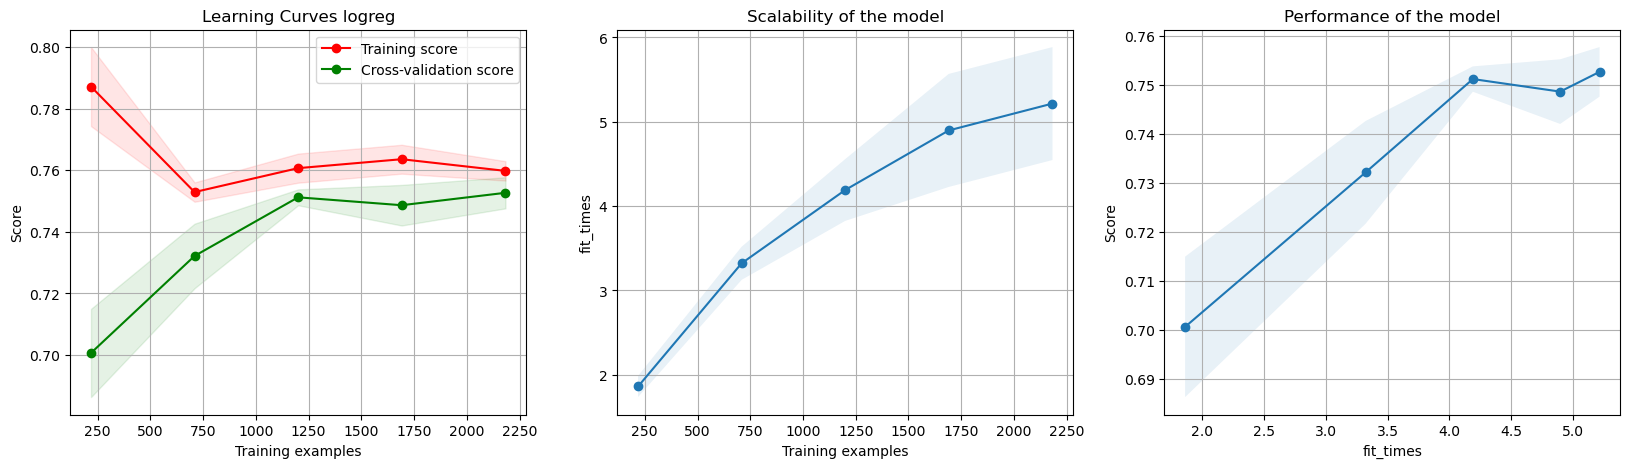

In [62]:
plot_learning_curve(loaded_best_estimator_round2, 'Learning Curves logreg', X_train, y_train, n_jobs=-1)

### <font color = 'pickle'>**Check Cross Validation Score and Train Score**

In [63]:
#let's check the train scores
print(loaded_best_estimator_round2.score(X_train,y_train))

#let's check the cross validation score
print(loaded_complete_grid_round2.best_score_)

0.7632832539391718
0.752659206237188


<font color = 'indianred'> **The cross-validation score has improved. We will try to incease model complexity further by adding even higher degree polynomial.**

## <font color = 'pickle'>**Hyperparameter Tuning - Round 3**
In this round, we will try polynomial of degree 4.

### <font color = 'pickle'>**Specify Param Grid**

In [64]:
param_grid_3 = {
    'discretizer_cs__transformer__n_bins': range(2, 12, 4),
    'discretizer_bal__transformer__n_bins': range(2, 12, 4),
    'poly_features__transformer__degree':[4],
    'logreg__C': [10000000000],
  }
# 'logreg__l1_ratio': np.linspace(0, 1, 3)
# now we set up the grid search with cross-validation
grid_logreg_3 = GridSearchCV(churn_pipeline_poly, param_grid_3,
                           cv=5, return_train_score= True, n_jobs=-1)

### <font color = 'pickle'>**Fit Model**

In [65]:
grid_logreg_3.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('drop_features',
                                        DropFeatures(features_to_drop=['RowNumber',
                                                                       'CustomerId',
                                                                       'Surname',
                                                                       'Unnamed: '
                                                                       '0'])),
                                       ('imputer_median',
                                        MeanMedianImputer(variables=['Age',
                                                                     'Balance',
                                                                     'NumOfProducts'])),
                                       ('imputer_catgorical_frequent',
                                        CategoricalImputer(imputation_method='frequent',
                                                           variables=['Gender',
                                                                      'Geography'])),
                                       ('imputer_...
                                                                          'Tenure',
                                                                          'EstimatedSalary',
                                                                          'NumOfProducts'])])),
                                       ('logreg',
                                        LogisticRegression(max_iter=100000,
                                                           n_jobs=-1,
                                                           random_state=123,
                                                           solver='saga'))]),
             n_jobs=-1,
             param_grid={'discretizer_bal__transformer__n_bins': range(2, 12, 4),
                         'discretizer_cs__transformer__n_bins': range(2, 12, 4),
                         'logreg__C': [10000000000],
                         'poly_features__transformer__degree': [4]},
             return_train_score=True)

### <font color = 'pickle'>**Get Best Params**

In [66]:
#Let's check the best_parameters from GridSearchCv for our model
print(grid_logreg_3.best_params_)

{'discretizer_bal__transformer__n_bins': 6, 'discretizer_cs__transformer__n_bins': 6, 'logreg__C': 10000000000, 'poly_features__transformer__degree': 4}


### <font color = 'pickle'>**Save Model**

In [67]:
file_best_estimator_round3 = save_model_folder / 'logreg_round3_best_estimator.pkl'
file_complete_grid_round3 = save_model_folder / 'logreg_round3_complete_grid.pkl'

In [68]:
joblib.dump(grid_logreg_3.best_estimator_, file_best_estimator_round3)
joblib.dump(grid_logreg_3, file_complete_grid_round3)

['/home/harpreet/Insync/google_drive_shaannoor/data/models/ml_fall_2023/logreg_round3_complete_grid.pkl']

### <font color = 'pickle'>**Load Saved Model**

In [69]:
loaded_best_estimator_round3 = joblib.load(file_best_estimator_round3)
loaded_complete_grid_round3 = joblib.load(file_complete_grid_round3)

### <font color = 'pickle'>**Plot Learning Curve**

<module 'matplotlib.pyplot' from '/home/harpreet/mambaforge/lib/python3.10/site-packages/matplotlib/pyplot.py'>

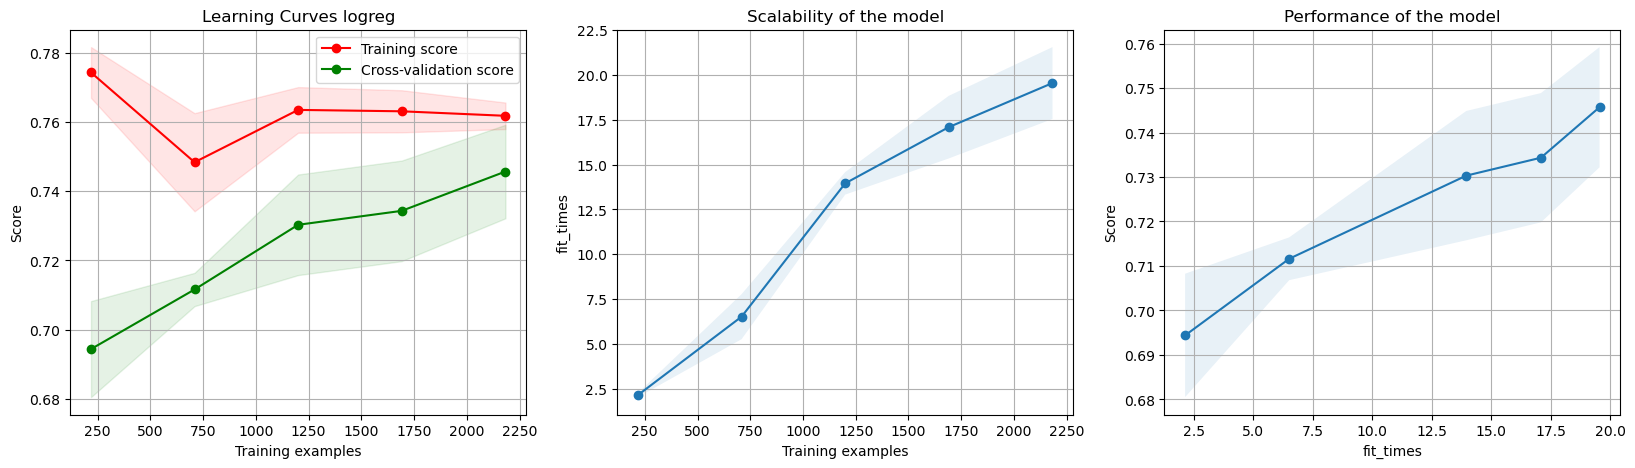

In [70]:
plot_learning_curve(loaded_best_estimator_round3  , 'Learning Curves logreg', X_train, y_train, n_jobs=-1)

### <font color = 'pickle'>**Check Cross Validation Score and Train Score**

In [71]:
#let's check the train scores
print(loaded_best_estimator_round3.score(X_train,y_train))

#let's check the cross validation score
print(loaded_complete_grid_round3.best_score_)

0.759985342616343
0.7460597506469065


<font color = 'indianred'> Adding higher degree polynomial has not improved the results.**It seems that model with polynomial features with degree =3 gives us the best cross-validation results.** 

## <font color = 'pickle'>**Modify Pipeline - Round 4**
Here, we will use one hot encoding instead of Decision tree encoding for categorical variables.

In [77]:
columns_to_drop = ['RowNumber', 'CustomerId', 'Surname','Unnamed: 0']

churn_pipeline_poly_2 = Pipeline([
                           
    ('drop_features',
      DropFeatures(columns_to_drop)),

    ('imputer_median',
      MeanMedianImputer(imputation_method='median', variables=['Age', 'Balance', 'NumOfProducts'])),

    ('imputer_catgorical_frequent',
      CategoricalImputer(imputation_method = 'frequent', variables=['Gender','Geography'])),

      ('imputer_missing_indicator',
      AddMissingIndicator(variables=['Age', 'Geography'])),

    ('imputer_random_sample',
      RandomSampleImputer(random_state=123, variables=['Tenure'])),
    
    ('log_transformer', LogTransformer(variables = ['Age'])
      ),
    
    ('discretizer_cs',
      SklearnTransformerWrapper(KBinsDiscretizer(n_bins=10, encode= 'ordinal', strategy = 'kmeans', subsample=None), 
                               variables = ['CreditScore'])),

    ('discretizer_bal',
      SklearnTransformerWrapper(KBinsDiscretizer(n_bins=10, encode= 'ordinal', strategy = 'kmeans' , subsample=None),
                               variables = ['Balance'])),
    
    ('one_hot_encoder',
      OneHotEncoder(variables=['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'CreditScore', 'Balance']
                   , drop_last= True, ignore_format=True)),

    ('outlier',
      Winsorizer(capping_method='gaussian', tail ='both', fold = 3, variables=['Age'])),

    ('scalar',
      SklearnTransformerWrapper(MinMaxScaler(), variables = ['Age', 'Tenure', 'EstimatedSalary', 'NumOfProducts'])),
    
    ('poly_features', poly_transformer),

    ('logreg',
     LogisticRegression(random_state=123, max_iter =100000, n_jobs=-1
                       ,solver = 'saga'))
])

In [78]:
from sklearn import set_config

set_config(display='diagram')
churn_pipeline_poly_2

Pipeline(steps=[('drop_features',
                 DropFeatures(features_to_drop=['RowNumber', 'CustomerId',
                                                'Surname', 'Unnamed: 0'])),
                ('imputer_median',
                 MeanMedianImputer(variables=['Age', 'Balance',
                                              'NumOfProducts'])),
                ('imputer_catgorical_frequent',
                 CategoricalImputer(imputation_method='frequent',
                                    variables=['Gender', 'Geography'])),
                ('imputer_missing_indicator',
                 AddMissingI...
                 SklearnTransformerWrapper(transformer=MinMaxScaler(),
                                           variables=['Age', 'Tenure',
                                                      'EstimatedSalary',
                                                      'NumOfProducts'])),
                ('poly_features',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('transformer',
                                                  PolynomialFeatures(),
                                                  ['Age', 'Tenure',
                                                   'EstimatedSalary',
                                                   'NumOfProducts'])])),
                ('logreg',
                 LogisticRegression(max_iter=100000, n_jobs=-1,
                                    random_state=123, solver='saga'))])

### <font color = 'pickle'>**Specify Param Grid**

In [79]:
param_grid_4 = {
    # try different feature engineering parameters
    
    'discretizer_cs__transformer__n_bins': range(4, 10, 2),
    'discretizer_bal__transformer__n_bins': range(4, 10, 2),
    'scalar__transformer': [StandardScaler()],
    'poly_features__transformer__degree':[3],
    'logreg__C': [10000000000],
    }

# now we set up the grid search with cross-validation
grid_logreg_4 = GridSearchCV(churn_pipeline_poly_2, param_grid_4,
                           cv=5, return_train_score= True, n_jobs=-1)

### <font color = 'pickle'>**Fit Model**

In [80]:
grid_logreg_4.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('drop_features',
                                        DropFeatures(features_to_drop=['RowNumber',
                                                                       'CustomerId',
                                                                       'Surname',
                                                                       'Unnamed: '
                                                                       '0'])),
                                       ('imputer_median',
                                        MeanMedianImputer(variables=['Age',
                                                                     'Balance',
                                                                     'NumOfProducts'])),
                                       ('imputer_catgorical_frequent',
                                        CategoricalImputer(imputation_method='frequent',
                                                           variables=['Gender',
                                                                      'Geography'])),
                                       ('imputer_...
                                       ('logreg',
                                        LogisticRegression(max_iter=100000,
                                                           n_jobs=-1,
                                                           random_state=123,
                                                           solver='saga'))]),
             n_jobs=-1,
             param_grid={'discretizer_bal__transformer__n_bins': range(4, 10, 2),
                         'discretizer_cs__transformer__n_bins': range(4, 10, 2),
                         'logreg__C': [10000000000],
                         'poly_features__transformer__degree': [3],
                         'scalar__transformer': [StandardScaler()]},
             return_train_score=True)

### <font color = 'pickle'>**Get Best Params**

In [76]:
#Let's check the best_parameters from GridSearchCv for our model
print(grid_logreg_4.best_params_)

{'discretizer_bal__transformer__n_bins': 8, 'discretizer_cs__transformer__n_bins': 8, 'logreg__C': 10000000000, 'poly_features__transformer__degree': 3, 'scalar__transformer': StandardScaler()}


### <font color = 'pickle'>**Save Model**

In [81]:
file_best_estimator_round4 = save_model_folder / 'logreg_round4_best_estimator.pkl'
file_complete_grid_round4 = save_model_folder / 'logreg_round4_complete_grid.pkl'

In [82]:
joblib.dump(grid_logreg_4.best_estimator_, file_best_estimator_round4)
joblib.dump(grid_logreg_4, file_complete_grid_round4)

['/home/harpreet/Insync/google_drive_shaannoor/data/models/ml_fall_2023/logreg_round4_complete_grid.pkl']

### <font color = 'pickle'>**Load Saved Model**

In [83]:
loaded_best_estimator_round4 = joblib.load(file_best_estimator_round4)
loaded_complete_grid_round4 = joblib.load(file_complete_grid_round4)

### <font color = 'pickle'>**Plot Learning Curve**

<module 'matplotlib.pyplot' from '/home/harpreet/mambaforge/lib/python3.10/site-packages/matplotlib/pyplot.py'>

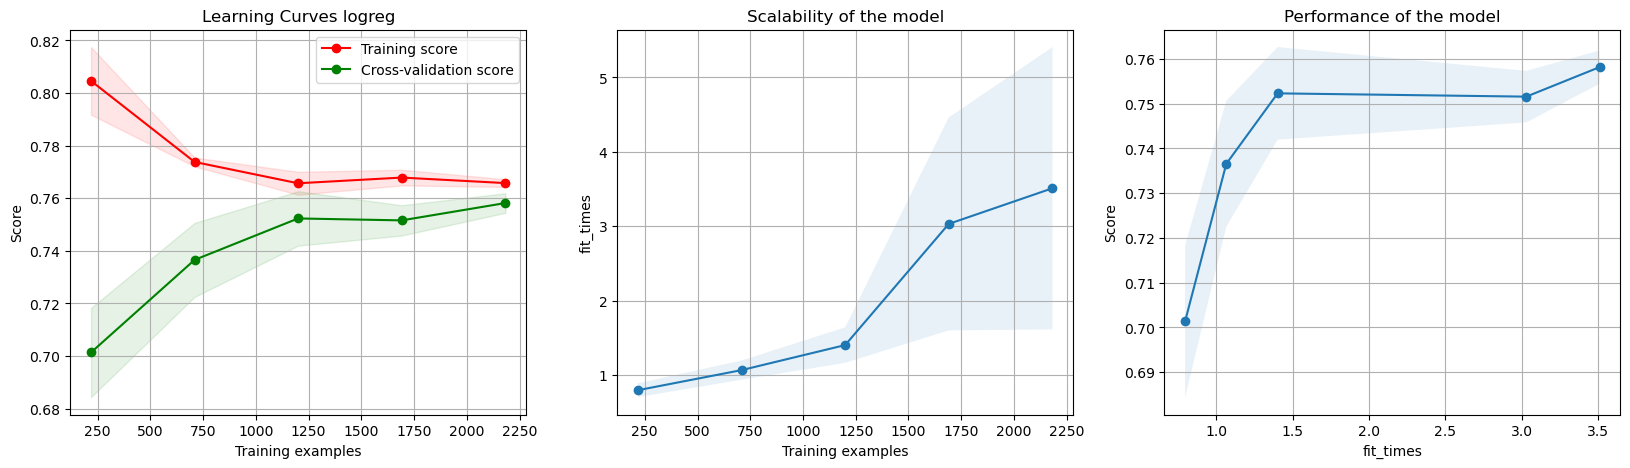

In [84]:
plot_learning_curve(loaded_best_estimator_round4 , 'Learning Curves logreg', X_train, y_train, n_jobs=-1)

### <font color = 'pickle'>**Check Cross Validation Score and Train Score**

In [85]:
#let's check the train scores
print(loaded_best_estimator_round4.score(X_train,y_train))

#let's check the cross validation score
print(loaded_complete_grid_round4.best_score_)

0.765115426896299
0.7581550559532211


<font color = 'indianred'>**The crossvalidation score is slightly better than round 2 (0.752). The fit times are also very similar.**  The learning curves also looks good. There does not seem to be any underfitting or overfitting issue. Since there is no ovrfitting and training and cross-validation scores are very similar, we will not need to tune regularization paramter C in this case.

# <font color = 'pickle'>**Perfromnace on Test Data**

## <font color = 'pickle'> **Test Accuracy** using best model (Round 4 saved model

### <font color = 'pickle'>**Load saved Model**

In [86]:
file_best_estimator_round4 = save_model_folder / 'logreg_round4_best_estimator.pkl'
file_complete_grid_round4 = save_model_folder / 'logreg_round4_complete_grid.pkl'

In [87]:
loaded_best_estimator_round4 = joblib.load(file_best_estimator_round4)
loaded_complete_grid_round4 = joblib.load(file_complete_grid_round4)

### <font color = 'pickle'>**Test Accuracy**

In [88]:
#let's check the test scores for final model
print(f'Test data accauracy for round 4: {loaded_best_estimator_round4.score(X_test,y_test)}')

Test data accauracy for round 4: 0.7613382899628253


### <font color = 'pickle'> **Confusion Matrix- Round3**

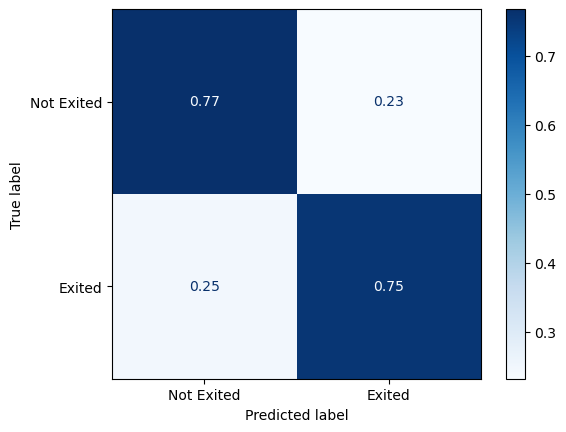

In [89]:
ConfusionMatrixDisplay.from_estimator(loaded_best_estimator_round4, X_test, y_test,
                                 display_labels=['Not Exited', 'Exited'],
                                 cmap=plt.cm.Blues,
                                 normalize = 'true')
plt.grid(False)
plt.show()

# <font color = 'pickle'>**Final Conclusion**



The round 4 pipeline seems to have the best performance. The perfrmnace was slightly better than KNN model as well. Further, for KNN models we see that fit time increases at a higher rate with number of observations. If we have a huge test dataset then KNN model might take longer than logistic regression. During inference, Logistic regression model usually scales better than KNN model.